**TASK 1**

In [42]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import numpy as np
import os
import pandas as pd


import numpy as np
import io 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

import pickle 

In [44]:
student_id = 2204923 

In [45]:

#numpy seed
np.random.seed(student_id)

In this part, i want to run 4 different classifier for OLID dataset for my text classiffication. I will use Support vector machine classifier, Decision Tree classifier, Convolution Neural Network and Long short term memory(a type of recurrent neural network)

In [46]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Proportion for each label in the train dataset

In [48]:
import pandas as pd

# read the dataset
traindf = pd.read_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv", index_col=0)

# count the number of offensive and non-offensive examples
train_offensive_count = (traindf["label"] == "OFF").sum()
train_non_offensive_count = (traindf["label"] == "NOT").sum()

# calculate the proportions
total_count = len(traindf)
train_offensive_proportion = (train_offensive_count / total_count)*100
train_non_offensive_proportion = (train_non_offensive_count / total_count)*100

print(traindf.head())
print("")
print("shape of validation dataset:")
print(traindf.shape)
print("")
print("proportion of each label")
print(f"Proportion of offensive speech: {train_offensive_proportion:.2f}")
print(f"Proportion of non-offensive speech: {train_non_offensive_proportion:.2f}")


                                                   tweet label
id                                                            
42884  @USER I’m done with you as well. An INTENTIONA...   NOT
92152  I now have over 6k followers.  Only 94k to go ...   NOT
65475  @USER Tom was bought! He is more interested in...   NOT
22144  @USER @USER Even her brother thinks she is a m...   OFF
81048  @USER @USER @USER @USER @USER I can understand...   OFF

shape of validation dataset:
(12313, 2)

proportion of each label
Proportion of offensive speech: 33.23
Proportion of non-offensive speech: 66.77


proportion for labels in the validation dataset

In [49]:
import pandas as pd

# read the dataset
validdf = pd.read_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/valid.csv", index_col=0)

# count the number of offensive and non-offensive examples
valid_offensive_count = (validdf["label"] == "OFF").sum()
valid_non_offensive_count = (validdf["label"] == "NOT").sum()

# calculate the proportions
total_count = len(validdf)
valid_offensive_proportion = (valid_offensive_count / total_count)*100
valid_non_offensive_proportion = (valid_non_offensive_count / total_count)*100

print(validdf.head())
print("")
print("shape of validation dataset:")
print(validdf.shape)
print("")
print("proportion of each label")
print(f"Proportion of offensive speech: {valid_offensive_proportion:.2f}")
print(f"Proportion of non-offensive speech: {valid_non_offensive_proportion:.2f}")


                                                   tweet label
id                                                            
12476  @USER @USER @USER Trump is declassifying infor...   NOT
23242  @USER Ha even with them trying to rig the syst...   NOT
97885  @USER @USER @USER Man you really thought this ...   NOT
43414  @USER Ms. Clinton - you are a class act. My re...   OFF
81403  @USER It’s still here at 753. If someone did t...   NOT

shape of validation dataset:
(927, 2)

proportion of each label
Proportion of offensive speech: 33.23
Proportion of non-offensive speech: 66.77


Getting the proportion and shape of test dataset.

In [50]:
import pandas as pd

# read the dataset
testdf = pd.read_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv", index_col=0)

# count the number of offensive and non-offensive examples
test_offensive_count = (testdf["label"] == "OFF").sum()
test_non_offensive_count = (testdf["label"] == "NOT").sum()

# calculate the proportions
total_count = len(testdf)
test_offensive_proportion = (test_offensive_count / total_count)*100
test_non_offensive_proportion = (test_non_offensive_count / total_count)*100

print(testdf.head())
print("")
print("shape of validation dataset:")
print(testdf.shape)
print("")
print("proportion of each label")
print(f"Proportion of offensive speech: {test_offensive_proportion:.2f}")
print(f"Proportion of non-offensive speech: {test_non_offensive_proportion:.2f}")


                                                   tweet label
id                                                            
15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF
27014  #ConstitutionDay is revered by Conservatives, ...   NOT
30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT
13876  #Watching #Boomer getting the news that she is...   NOT
60133  #NoPasaran: Unity demo to oppose the far-right...   OFF

shape of validation dataset:
(860, 2)

proportion of each label
Proportion of offensive speech: 27.91
Proportion of non-offensive speech: 72.09


Testing the accuracy performance of the Support vector machine classiffier

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import joblib
from nltk.corpus import stopwords



# Define the function for loading the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data['tweet'].values
    y = data['label'].values
    return X, y

# Define the function for extracting handcrafted features from the text
def extract_handcrafted_features(texts):
    features = []
    for text in texts:
        # Extract handcrafted features such as character n-grams, punctuation marks, capitalization, etc.
        # Append the features to the list
        features.append([len(text), len(text.split()), len(text.splitlines())])
    return np.array(features)

# Load the data and split it into training and testing sets
X_train, y_train = load_data('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
X_test, y_test = load_data('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')

# Represent the text using word n-grams and stop words of English
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english')
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)

# Train the SVM model with word n-grams and linear kernel
svm = SVC(C=1, gamma=0.01, kernel='linear')
svm.fit(X_train_ngrams, y_train)

# Evaluate the SVM model on the test set with word n-grams
y_pred_svm_ngrams = svm.predict(X_test_ngrams)
from sklearn.metrics import accuracy_score
accuracy_svm_ngrams = accuracy_score(y_test, y_pred_svm_ngrams)

# Save the model to a file
joblib.dump(svm, '/content/gdrive/MyDrive/CE807/Assignment2/2204923/svm_model.pkl')

# Compute the evaluation metrics
print("SVM with word n-grams and stop words of English:")
print("F1 score:", f1_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
print("Precision:", precision_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
print("Recall:", recall_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
print("Macro F1 score:", f1_score(y_test, y_pred_svm_ngrams, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm_ngrams))
print("Accuracy of SVM with word n-grams and stop words of English:", accuracy_svm_ngrams)


SVM with word n-grams and stop words of English:
F1 score: 0.5672371638141809
Precision: 0.6863905325443787
Recall: 0.48333333333333334
Macro F1 score: 0.7161128610832919
Confusion matrix:
 [[567  53]
 [124 116]]
Accuracy of SVM with word n-grams and stop words of English: 0.7941860465116279


This code implements a binary text classification task using Support Vector Machines (SVM) algorithm and evaluates their performance using various evaluation metrics such as F1 score, precision, recall, and confusion matrix. The input data is loaded from CSV files, and then pre-processed using CountVectorizer which convert collection of text documents to a vector, to represent the text as word n-grams. Ngram are use in analysing text with sequence of words.  i define a function, Handcrafted features such as character n-grams, punctuation marks (stop word is set to english language), and capitalization are also extracted from the text. The SVM model is trained on the n-gram features. The trained models are then used to predict the labels of the test set which gives approximately 0.8  accuracy( we can also represent in percentage by multiplying it by 100.which give 80%) but i prefer representing it statistically.

**Using decision Tree as text classifier**

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import joblib

# Define the function for loading the data
def load_data(file_path):
    data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
    X = data['tweet'].values
    y = data['label'].values
    return X, y

# Load the data and split it into training and testing sets
X_train, y_train = load_data('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
X_test, y_dtc_test = load_data('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')

# Represent the text using word n-grams
vectorizer = CountVectorizer(ngram_range=(1,3))
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)

# Train the Decision Tree Classifier with word n-grams
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ngrams, y_train)

# Predict on the test set with word n-grams
y_pred_dtc_ngrams = dtc.predict(X_test_ngrams)

# Save the model to a file
joblib.dump(dtc, '/content/gdrive/MyDrive/CE807/Assignment2/2204923/dtc_model.pkl')

# Evaluate the Decision Tree Classifier on the test set with word n-grams
accuracy_dtc_ngrams = accuracy_score(y_dtc_test, y_pred_dtc_ngrams)
f1_dtc_ngrams = f1_score(y_dtc_test, y_pred_dtc_ngrams, average='macro')
precision_dtc_ngrams = precision_score(y_dtc_test, y_pred_dtc_ngrams, average='macro')
recall_dtc_ngrams = recall_score(y_dtc_test, y_pred_dtc_ngrams, average='macro')
confusion_matrix_dtc_ngrams = confusion_matrix(y_dtc_test, y_pred_dtc_ngrams, labels=['NOT', 'OFF'])
print(" ")
# Print the metrics of the Decision Tree Classifier with word n-grams
print("Accuracy of Decision Tree Classifier with word n-grams:", accuracy_dtc_ngrams)
print("F1 score of Decision Tree Classifier with word n-grams:", f1_dtc_ngrams)
print("Precision of Decision Tree Classifier with word n-grams:", precision_dtc_ngrams)
print("Recall of Decision Tree Classifier with word n-grams:", recall_dtc_ngrams)
print("Confusion matrix of Decision Tree Classifier with word n-grams:")
print(confusion_matrix_dtc_ngrams)

 
Accuracy of Decision Tree Classifier with word n-grams: 0.9987817753593763
F1 score of Decision Tree Classifier with word n-grams: 0.998626161846101
Precision of Decision Tree Classifier with word n-grams: 0.9990893637688198
Recall of Decision Tree Classifier with word n-grams: 0.9981671554252199
Confusion matrix of Decision Tree Classifier with word n-grams:
[[8221    0]
 [  15 4077]]


This code loads a dataset of tweets, preprocesses the text data by converting it to word n-grams, trains a decision tree classifier on the preprocessed data, and evaluates the classifier on a test set using various performance metrics such as accuracy, F1 score, precision, recall, and confusion matrix. The code defines a function for loading the data from a CSV file and another function for extracting the n-gram features from the text data. The accuracy of the fitted model is 0.99.






**Using CNN as the fitted model**

In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

# Load the data
train_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')

# Tokenize the text and remove stop words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['tweet'])
X_train = tokenizer.texts_to_sequences(train_data['tweet'])
X_train = [[word for word in seq if word not in stop_words] for seq in X_train]
X_test = tokenizer.texts_to_sequences(test_data['tweet'])
X_test = [[word for word in seq if word not in stop_words] for seq in X_test]

# Pad the sequences to have the same length
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to numerical values
encoder = LabelEncoder()
train_data['label'] = encoder.fit_transform(train_data['label'])
test_data['label'] = encoder.transform(test_data['label'])

# Train the model
history = model.fit(X_train, train_data['label'], epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy = model.evaluate(X_test, test_data['label'], verbose=0)[1]
f1 = f1_score(test_data['label'], y_pred)
precision = precision_score(test_data['label'], y_pred)
recall = recall_score(test_data['label'], y_pred)
cm = confusion_matrix(test_data['label'], y_pred)

# Print the metrics
print("Accuracy of CNN:", accuracy)
print("F1 score of CNN:", f1)
print("Precision of CNN:", precision)
print("Recall of CNN:", recall)
print("Confusion matrix of CNN:")
print(cm)

# Save the model and prediction outcomes
model.save('/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model.h5')
np.savetxt('/content/gdrive/MyDrive/CE807/Assignment2/2204923/output_test_cnn.csv', y_pred, fmt='%d')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10
174/174 [==============================] - 23s 121ms/step - loss: 0.6256 - accuracy: 0.6675 - val_loss: 0.5866 - val_accuracy: 0.6688
Epoch 2/10
174/174 [==============================] - 19s 111ms/step - loss: 0.4412 - accuracy: 0.7999 - val_loss: 0.5486 - val_accuracy: 0.7411
Epoch 3/10
174/174 [==============================] - 19s 111ms/step - loss: 0.2400 - accuracy: 0.9143 - val_loss: 0.7188 - val_accuracy: 0.7256
Epoch 4/10
174/174 [==============================] - 19s 109ms/step - loss: 0.1119 - accuracy: 0.9671 - val_loss: 1.0127 - val_accuracy: 0.7078
Epoch 5/10
174/174 [==============================] - 21s 118ms/step - loss: 0.0611 - accuracy: 0.9840 - val_loss: 1.1739 - val_accuracy: 0.7183
Epoch 6/10
174/174 [==============================] - 20s 117ms/step - loss: 0.0382 - accuracy: 0.9902 - val_loss: 1.3324 - val_accuracy: 0.6981
Epoch 7/10
174/174 [==============================] - 19s 111ms/step - loss: 0.0302 - accuracy: 0.9944 - val_loss: 1.4524 - val_ac

i use the code above for training and evaluating a Convolutional Neural Network (CNN) model to classify tweets into two categories: either being related to hate speech or not. I use the Keras API of TensorFlow library for building the model architecture, tokenizing and padding the tweet sequences, and fitting the model to the training data. I also uses scikit-learn library for encoding the labels and computing the evaluation metrics (accuracy, F1 score, precision, recall, and confusion matrix) on the test set. Finally i  predict the labels of the test set, which gives approxmately 0.77 accuracy.





**Using Long Short Term Memory(LSTM)**

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Load the data
train_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
test_lstm_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['tweet'])
X_train = tokenizer.texts_to_sequences(train_data['tweet'])
X_test = tokenizer.texts_to_sequences(test_data['tweet'])

# Pad the sequences to have the same length
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data['label'] = encoder.fit_transform(train_data['label'])
test_lstm_data['label'] = encoder.transform(test_lstm_data['label'])

# Train the model
history = model.fit(X_train, train_data['label'], epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
#loss, accuracy = model.evaluate(X_test, test_lstm_data['label'], verbose=0)

# Evaluate the model on the test set
y_lstm_pred = model.predict(X_test)
y_lstm_pred = np.round(y_lstm_pred).astype(int)
acc = model.evaluate(X_test, test_lstm_data['label'], verbose=0)[1]
f1s = f1_score(test_lstm_data['label'], y_lstm_pred)
precisions = precision_score(test_lstm_data['label'], y_lstm_pred)
recalls = recall_score(test_lstm_data['label'], y_lstm_pred)
cms = confusion_matrix(test_lstm_data['label'], y_lstm_pred)

# Print the metrics
print("Accuracy of LSTM:", acc)
print("F1 score of LSTM:", f1s)
print("Precision of LSTM:", precision)
print("Recall of LSTM:", recalls)
print("Confusion matrix of LSTM:")
print(cms)
# Print the accuracy
print("Accuracy of LSTM:", acc)



Epoch 1/10
174/174 [==============================] - 95s 525ms/step - loss: 0.6450 - accuracy: 0.6650 - val_loss: 0.6367 - val_accuracy: 0.6672
Epoch 2/10
174/174 [==============================] - 84s 485ms/step - loss: 0.6396 - accuracy: 0.6677 - val_loss: 0.6390 - val_accuracy: 0.6672
Epoch 3/10
174/174 [==============================] - 85s 491ms/step - loss: 0.6385 - accuracy: 0.6677 - val_loss: 0.6369 - val_accuracy: 0.6672
Epoch 4/10
174/174 [==============================] - 90s 516ms/step - loss: 0.6390 - accuracy: 0.6677 - val_loss: 0.6383 - val_accuracy: 0.6672
Epoch 5/10
174/174 [==============================] - 86s 497ms/step - loss: 0.6379 - accuracy: 0.6678 - val_loss: 0.6365 - val_accuracy: 0.6672
Epoch 6/10
174/174 [==============================] - 86s 495ms/step - loss: 0.6389 - accuracy: 0.6678 - val_loss: 0.6360 - val_accuracy: 0.6672
Epoch 7/10
174/174 [==============================] - 88s 502ms/step - loss: 0.6377 - accuracy: 0.6678 - val_loss: 0.6362 - val_ac

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The code above implements a LSTM (Long Short-Term Memory) neural network model for text classification on tweets. The model is built using the Keras API of TensorFlow just as the CNN. I  first loads the training and test data from CSV files and tokenizes the text using the Tokenizer class. The sequences are then padded to have the same length.

The LSTM model is defined with an Embedding layer, an LSTM layer with 128 units, a Dense layer with 64 units and a Dropout layer with a dropout rate of 0.5. The model is compiled with binary cross-entropy loss which compare each of the predicted probability to actual class output, 0 or 1 and the Adam optimizer to adjust the learning rate for each parameter.

The training data labels are encoded using the LabelEncoder class from scikit-learn. The model is then trained on the training data using 10 epochs and a batch size of 64 with a 10% validation split. The model is evaluated on the test data and metrics such as accuracy is printed which gives 0.72 accuracy.

Getting all the model performance at a glance by building a function for easier explanation. we will get the prediction output of each of the model computed above to include in the function

In [55]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def compute_performance(y_true, y_pred, split='test'):
    print('Computing different performance metrics on', split, 'set of Dataset')
    
    # Compute and print accuracy
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy:', acc)
    
    # Compute and print recall, precision, f1-score (macro), and confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    f1 = 2 * precision * recall / (precision + recall)
    f1_macro = np.mean(f1)
    
    print('Confusion matrix:')
    print(cm)
    print('Recall (macro):', np.mean(recall))
    print('Precision (macro):', np.mean(precision))
    print('F1 score (macro):', f1_macro)
    print('')
    
print('performance metric for support vector machine:')
compute_performance(y_test, y_pred_svm_ngrams, split='test')
print('performance metric for Decision Tree Classifier:')
compute_performance(y_dtc_test, y_pred_dtc_ngrams, split='test') 
print('performance metric for LSTM:')
compute_performance(test_lstm_data['label'], y_lstm_pred, split='test') 
print('performance metric for CNN:') 
compute_performance(test_data['label'], y_pred, split='test') 


   


performance metric for support vector machine:
Computing different performance metrics on test set of Dataset
Accuracy: 0.7941860465116279
Confusion matrix:
[[567  53]
 [124 116]]
Recall (macro): 0.6989247311827957
Precision (macro): 0.7534702300927393
F1 score (macro): 0.7161128610832919

performance metric for Decision Tree Classifier:
Computing different performance metrics on test set of Dataset
Accuracy: 0.9987817753593763
Confusion matrix:
[[8221    0]
 [  15 4077]]
Recall (macro): 0.9981671554252199
Precision (macro): 0.9990893637688198
F1 score (macro): 0.998626161846101

performance metric for LSTM:
Computing different performance metrics on test set of Dataset
Accuracy: 0.7209302325581395
Confusion matrix:
[[620   0]
 [240   0]]
Recall (macro): 0.5
Precision (macro): nan
F1 score (macro): nan

performance metric for CNN:
Computing different performance metrics on test set of Dataset
Accuracy: 0.7767441860465116
Confusion matrix:
[[542  78]
 [114 126]]
Recall (macro): 0.699596

<ipython-input-55-0e049af5c42d>:14: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis=0)


From the performance metrics output for diffrent model above, it clear that Decision tree gives the best accuracy performance but having a 99% accuracy doesn't mean it fit the training data perfection, it might mean there is a problem using the model. 

Using the LSTM model to fit the traing and test data gives 72% accuracy but precision, F1 score is not able to compute. Also, when i tried increasing the dataset by shuffling and randomly selecting the train data base on different sizes. The accuracy is still unchanges which means it does not fit the data well.

Now using Support vector machine classifier, it gives a approximately 80% accuracy with f1 score of 0.72. SVM perform well in dataset that have high dimension feature space. It make text classification easier by eliminating the need for feature selection. SVM is also better in binary classification which make it suit this task  better.

CNN, gives accuracy of approximately 0.77 with macro f1 score of 0.7. CNNs are particularly effective when working with text data that has a spatial structure, such as text data in the form of images, where the spatial arrangement of words within a sentence or document provides additional information that can be leveraged by the model. For example, CNNs have been shown to be effective in text classification tasks such as sentiment analysis, where the location of specific words or phrases within a sentence can be indicative of sentiment.

In addition, CNNs can be beneficial when working with text data that has a large vocabulary, as they are able to learn high-level, abstract representations of the input data, which can be useful for generalizing to new, unseen text data. This make advantages make it suit the task better.

In conclusion the selected model classiffier i will go for is the **Support Vector Machine and Convolusion Neural Network**

In [56]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [57]:
# google drive path
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) 
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))


List files:  ['test.csv', 'valid.csv', 'train.csv', '.ipynb_checkpoints', 'train_25_sample.csv', 'train_50_sample.csv', 'train_75_sample.csv', 'cnn_model.pkl', 'cnn_predictions.csv', 'output.csv', 'cnn_model_frac_25.h5', 'cnn_model_frac_50.h5', 'output_cnn.csv', 'output_test_dtc.csv', 'svm_model.pkl', 'dtc_model.pkl', 'output_test_cnn.csv', 'cnn_model.h5', 'output_test_svm.csv', 'cnn_model_frac_60.h5', 'cnn_model_frac_75.h5', 'cnn_model_frac_85.h5', 'cnn_model_frac_100.h5', 'train_25pct.csv', 'train_75pct.csv', 'train_100pct.csv', 'train_50pct.csv', 'output_label_cnn_50.0.csv', 'output_label_cnn_100.0.csv', 'output_label_cnn_75.0.csv', 'output_label_cnn_25.0.csv', 'train_25pct_output_test_svm.csv', 'train_50pct_output_test_svm.csv', 'train_75pct_output_test_svm.csv', 'train_100pct_output_test_svm.csv', 'svm_model_0.6.pkl', 'svm_model_0.75.pkl', 'svm_model_0.85.pkl', 'svm_model_1.0.pkl', 'svm_predicted_labels.csv', 'cnn_predictions_label.csv']


In [58]:
# set path for train, validation and test dataset

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

Validation file:  gdrive/MyDrive/./CE807/Assignment2/2204923/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2204923/test.csv


Model 1 directory

In [59]:
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'svm_model.pkl', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)


MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)


model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'train_25pct_output_test_svm.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'train_50pct_output_test_svm.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'train_75pct_output_test_svm.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_75_output_test_file)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'train_100pct_output_test_svm.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)




Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/25
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/50
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/75
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/100
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/25/train_25pct_output_test_svm.csv
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/50/train_50pct_output_test_svm.csv
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/svm_model.pkl/1/75/train_75pct_output_test_svm.csv
Output file name using model 1 using 100% of train data:  gdrive/MyDrive/./CE807/A

Model 2 directory

In [60]:
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'cnn_model.h5', '1') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)


MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)


model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_label_cnn25.0.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_label_cnn50.0.csv') # Output file using Model 2 trained using 50% of train data 
print('Output file name using model 2 using 50% of train data: ',model_2_50_output_test_file)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_label_cnn75.0.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_75_output_test_file)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_label_cnn100.0.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)




Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/25
Model 2 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/50
Model 2 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/75
Model 2 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/100
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/25/output_label_cnn25.0.csv
Output file name using model 2 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/50/output_label_cnn50.0.csv
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.h5/1/75/output_label_cnn75.0.csv
Output file name using model 2 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2204923/cnn_model.

**TASK 2**
**Method 1, training with support vector machine**

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import joblib

# Define the function for loading the data
def load_data(file_path):
    data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
    X = data['tweet'].values
    y = data['label'].values
    return X, y

# Define the function for extracting handcrafted features from the text
def extract_handcrafted_features(texts):
    features = []
    for text in texts:
        # Extract handcrafted features such as character n-grams, punctuation marks, capitalization, etc.
        # Append the features to the list
        features.append([len(text), len(text.split()), len(text.splitlines())])
    return np.array(features)

# Load the training, validation, and test data
X_train_full, y_train_full = load_data('train.csv')
X_val, y_val = load_data('valid.csv')
X_test, y_test = load_data('test.csv')

# Split the training data into four subsets with different sizes (60%,  75%, 85% and 100%)
train_sizes = [0.6, 0.75, 0.85, 1.0]
for size in train_sizes:
    # Select a random subset of the training data with the specified size
    X_train, y_train = load_data('train.csv')
    indices = np.random.choice(len(X_train), int(len(X_train) * size), replace=False)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Represent the text using word n-grams
    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english')
    X_train_ngrams = vectorizer.fit_transform(X_train)
    X_val_ngrams = vectorizer.transform(X_val)

    # Train the SVM model with word n-grams
    svm_model = SVC()
    svm_model.fit(X_train_ngrams, y_train)

    # Save the model to a file
    joblib.dump(svm_model, f'/content/gdrive/MyDrive/CE807/Assignment2/2204923/svm_model_{size}.pkl')

    # Evaluate the SVM model on the validation set with word n-grams
    y_pred_svm_ngrams = svm_model.predict(X_val_ngrams)
    accuracy_svm_ngrams = svm_model.score(X_val_ngrams, y_val)

    # Compute the evaluation metrics
    print(f"SVM with {size*100}% of training data:")
    print("F1 score:", f1_score(y_val, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Precision:", precision_score(y_val, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Recall:", recall_score(y_val, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Macro F1 score:", f1_score(y_val, y_pred_svm_ngrams, average='macro'))
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred_svm_ngrams))
    print(f"Accuracy of SVM with {size*100}% of training data:", accuracy_svm_ngrams)
    print('')

SVM with 60.0% of training data:
F1 score: 0.3318494536624848
Precision: 0.9647058823529412
Recall: 0.20039100684261973
Macro F1 score: 0.5820494982191717
Confusion matrix:
 [[8191   30]
 [3272  820]]
Accuracy of SVM with 60.0% of training data: 0.731828149110696

SVM with 75.0% of training data:
F1 score: 0.40015509887553313
Precision: 0.9681050656660413
Recall: 0.25219941348973607
Macro F1 score: 0.6206138140771749
Confusion matrix:
 [[8187   34]
 [3060 1032]]
Accuracy of SVM with 75.0% of training data: 0.7487208641273451

SVM with 85.0% of training data:
F1 score: 0.46079344384429133
Precision: 0.9686765857478465
Recall: 0.302297165200391
Macro F1 score: 0.6552292503533654
Confusion matrix:
 [[8181   40]
 [2855 1237]]
Accuracy of SVM with 85.0% of training data: 0.76488264435962

SVM with 100.0% of training data:
F1 score: 0.5002718868950515
Precision: 0.968421052631579
Recall: 0.33724340175953077
Macro F1 score: 0.6779971606750101
Confusion matrix:
 [[8176   45]
 [2712 1380]]
Accu

The executed code consists of functions for training and evaluating a Support Vector Machine (SVM) model on a text classification task. The task involves classifying tweets as either offensive or non-offensive. The code uses the scikit-learn library for machine learning and pandas library for data manipulation.

The load_data function reads in the training data from a CSV file and returns the tweet texts and their corresponding labels as NumPy arrays. The extract_handcrafted_features function extracts several handcrafted features from the text, such as character n-grams, punctuation marks, and capitalization, and returns them as a NumPy array.

The training, validation, and test data are loaded using the load_data function. The training data is then split into four random subsets with different sizes using the train_sizes list. For each subset, a random sample subset of the training data with the specified size is selected. The text is represented using word n-grams using the CountVectorizer from scikit-learn. The SVM model is then trained on the training data with word n-grams using the SVM from scikit-learn. The trained model is saved to a file using the joblib library. The SVM model is evaluated on the validation set with word n-grams using several evaluation metrics, including F1 score, precision, recall, macro F1 score, and confusion matrix. Firstly, we take 60% of the training dataset which give accuracy of 0.73 and then increase the sample by 15% which make it 75% of the training dataset, give an accuracy of 0.75 and the with another increment of 15% gives an accuracy of 0.76 and then proceed by training the whole dataset which give an accuracy of 0.78 approximately.

The code uses a standard machine learning pipeline to train and evaluate an SVM model on a text classification task. It also provides a simple way to experiment with different training set sizes and evaluate the impact on the model's performance. 



Another way to ramdomly generate the sample size is shown in the code below. This allows a function to be built in order to get the performace metrics of each sample differently.

In [62]:
import pandas as pd

# load the train.csv file into a pandas dataframe
df = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')

# take a random sample of 60% of the dataframe
sample_60_df = df.sample(frac=0.6, random_state=42)

# take a random sample of 75% of the dataframe
sample_75_df = df.sample(frac=0.75, random_state=42)

# take a random sample of 85% of the dataframe
sample_85_df = df.sample(frac=0.85, random_state=42)


# save the sample as a new csv files
sample_60_df.to_csv('train_60_sample.csv', index=False)
sample_75_df.to_csv('train_75_sample.csv', index=False)
sample_85_df.to_csv('train_85_sample.csv', index=False)

train_100_df = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') # This is 100% of data
train_60_df = os.path.join(GOOGLE_DRIVE_PATH, 'train_60_sample.csv') #Let's assume that you have train 25% file is saved in train_25pct.csv. Note that this is a dummy file. You have to create your own file.
train_75_df = os.path.join(GOOGLE_DRIVE_PATH, 'train_75_sample.csv') #Let's assume that you have train 50% file is saved in train_25pct.csv. Note that this is a dummy file. You have to create your own file.
train_85_df = os.path.join(GOOGLE_DRIVE_PATH, 'train_85_sample.csv') #Let's assume that you have train 75% file is saved in train_25pct.csv. Note that this is a dummy file. You have to create your own file.


print('Train 100% data: ', train_100_df)
print('Train 60% data: ', train_60_df)
print('Train 75% data: ', train_75_df)
print('Train 85% data: ', train_85_df)


Train 100% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/train.csv
Train 60% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/train_60_sample.csv
Train 75% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/train_75_sample.csv
Train 85% data:  gdrive/MyDrive/./CE807/Assignment2/2204923/train_85_sample.csv


Load and test the model on test dataset

In [63]:
def svm_model(model_file_path, test_file_path, predicted_labels_file_path):
    # Load the SVM model from a file
    svm_model = joblib.load(model_file_path)

    # Load the test data
    X_test, y_test = load_data(test_file_path)

    # Represent the text using word n-grams
    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english')
    X_test_ngrams = vectorizer.fit_transform(X_test)

    # Use the SVM model to predict the labels of the test data
    y_pred_svm_ngrams = svm_model.predict(X_test_ngrams)

    # Save the predicted labels to a file
    with open(predicted_labels_file_path, 'w') as f:
        f.write(' '.join(map(str, y_pred_svm_ngrams)))

    # Compute the evaluation metrics
    print("SVM test results:")
    print("F1 score:", f1_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Precision:", precision_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Recall:", recall_score(y_test, y_pred_svm_ngrams, average='binary', pos_label='OFF'))
    print("Macro F1 score:", f1_score(y_test, y_pred_svm_ngrams, average='macro'))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm_ngrams))
    print("Accuracy:", accuracy_score(y_test, y_pred_svm_ngrams))
    
# Call the function
svm_model('/content/gdrive/MyDrive/CE807/Assignment2/2204923/svm_model.pkl', 
          '/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv', 
          '/content/gdrive/MyDrive/CE807/Assignment2/2204923/svm_predicted_labels.csv')


SVM test results:
F1 score: 0.9950992403822593
Precision: 0.9977886977886978
Recall: 0.9924242424242424
Macro F1 score: 0.9963348485681948
Confusion matrix:
 [[8212    9]
 [  31 4061]]
Accuracy: 0.9967514009583367


The above code define Svm function that take the parameter of svm model path, test dataset and prediction label directory which give the prediction outcome label.

In [64]:
# print the svm test dataset with the output label 
df_svm = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')
out_svm = pd.DataFrame( y_pred_svm_ngrams, columns=['Output_label'])
df_svm['Output_label'] = out_svm
print(df_svm)


        id                                              tweet label  \
0    15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF   
1    27014  #ConstitutionDay is revered by Conservatives, ...   NOT   
2    30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT   
3    13876  #Watching #Boomer getting the news that she is...   NOT   
4    60133  #NoPasaran: Unity demo to oppose the far-right...   OFF   
..     ...                                                ...   ...   
855  73439  #DespicableDems lie again about rifles. Dem Di...   OFF   
856  25657  #MeetTheSpeakers 🙌 @USER will present in our e...   NOT   
857  67018  3 people just unfollowed me for talking about ...   OFF   
858  50665  #WednesdayWisdom Antifa calls the right fascis...   NOT   
859  24583      #Kavanaugh typical #liberals , #Democrats URL   NOT   

    Output_label  
0            NOT  
1            NOT  
2            NOT  
3            NOT  
4            OFF  
..           ...  
855          O

In [65]:
df_svm
df_svm.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/output_test_svm.csv', index=False)
df_svm

,id,tweet,label,Output_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,OFF
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,NOT
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,OFF


model 2, CNN model

In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))


# Load the data
train_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')
valid_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/valid.csv')

# Shuffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Tokenize the text and remove stop words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['tweet'])
X_train = tokenizer.texts_to_sequences(train_data['tweet'])
X_train = [[word for word in seq if word not in stop_words] for seq in X_train]
X_test = tokenizer.texts_to_sequences(test_data['tweet'])
X_test = [[word for word in seq if word not in stop_words] for seq in X_test]
X_valid = tokenizer.texts_to_sequences(valid_data['tweet'])
X_valid = [[word for word in seq if word not in stop_words] for seq in X_valid]

# Pad the sequences to have the same length
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')
X_valid = pad_sequences(X_valid, maxlen=max_len, padding='post', truncating='post')

# Encode the labels
encoder = LabelEncoder()
train_data['label'] = encoder.fit_transform(train_data['label'])
test_data['label'] = encoder.transform(test_data['label'])
valid_data['label'] = encoder.transform(valid_data['label'])

# Train the model
history_list = []
for i, frac in enumerate([0.60, 0.75, 0.85, 1.0]):
    print("Training on", frac*100, "% of the data")
    # Select a fraction of the training data
    train_frac = train_data.sample(frac=frac)
    X_train_frac = tokenizer.texts_to_sequences(train_frac['tweet'])
    X_train_frac = pad_sequences(X_train_frac, maxlen=max_len, padding='post', truncating='post')
    y_train_frac = train_frac['label']

    # Define the CNN model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_frac, y_train_frac, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
    history_list.append(history)

    # Evaluate the model on the validation set
    # Evaluate the model on the validation set
    y_pred_cnn = model.predict(X_valid)
    y_pred_cnn = np.round(y_pred_cnn).flatten()
    print(classification_report(valid_data['label'], y_pred_cnn))
    print("Confusion matrix:\n", confusion_matrix(valid_data['label'], y_pred_cnn))
    print('')
    # Save the model
    model.save(f'/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model_frac_{int(frac*100)}.h5')

# Load the model
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model_frac_100.h5')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training on 60.0 % of the data
29/29 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       619
           1       0.58      0.50      0.54       308

    accuracy                           0.72       927
   macro avg       0.68      0.66      0.67       927
weighted avg       0.71      0.72      0.71       927

Confusion matrix:
 [[508 111]
 [153 155]]

Training on 75.0 % of the data
29/29 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       619
           1       0.56      0.56      0.56       308

    accuracy                           0.71       927
   macro avg       0.67      0.67      0.67       927
weighted avg       0.71      0.71      0.71       927

Confusion matrix:
 [[485 134]
 [135 173]]

Training on 85.0 % of the data
29/29 [==============================] - 1s 24ms/step
     

The above implements a convolutional neural network (CNN) model to classify tweets into two categories, offensive and not offensive. The data is loaded from two CSV files, and then it is preprocessed by tokenizing the text and padding the sequences to a fixed length. The labels are encoded using the LabelEncoder 0 and 1 from Scikit-learn.

I then trains the CNN model on different fractions of the training data and evaluates the model on the test set for each fraction. The CNN model consists of an embedding layer, followed by a one-dimensional convolutional layer, a max-pooling layer, a flattening layer, drop out layer which is used to nullifies the contribution of some neurons towards the next layer by dropping out the nodes in a neural network which take the parameter of 0.5, two dense layers with relu activation functions and a sigmoid activation function in the output layer. The model is compiled with binary cross-entropy loss and the Adam optimizer for faster computational time with fewer parameter tunning.

After each training run, the  outputs a classification report and a confusion matrix for the model's performance on the test set is ouputed as follows- accuracy of approximately 0.70, 0.72, 0.72, and 0.72 in respective of 60%, 75%, 85% and 100% of randomly selected train dataset.

we load the cnn model and test it on test dataset. After then, we save the prediction output.

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
import os


def cnn_model(model_path, test_data_path, output_dir):
    # Load the model
    loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model.h5')

    # Load the test data
    test_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv')

    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(test_data['tweet'])
    X_test = tokenizer.texts_to_sequences(test_data['tweet'])
    max_len = 100
    X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

    # Encode the labels
    encoder = {'OFF': 1, 'NOT': 0}
    test_data['label'] = test_data['label'].map(encoder)
    
    # Make predictions on the test data
    y_pred = loaded_model.predict(X_test)
    y_pred = np.round(y_pred).flatten()

    # Save the predictions to a CSV file
    output_path = os.path.join(output_dir, 'cnn_predictions_label.csv')
    output_df = pd.DataFrame({'id': test_data['id'], 'label': y_pred})
    output_df.to_csv(output_path, index=False)

    # Calculate the performance metrics
    accuracy = accuracy_score(test_data['label'], y_pred)
    recall = recall_score(test_data['label'], y_pred)
    precision = precision_score(test_data['label'], y_pred)
    f1 = f1_score(test_data['label'], y_pred)
    cmx = confusion_matrix(test_data['label'], y_pred)
    # Print the performance metrics
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)
    print("Confusion matrix:\n", cmx )
    print(output_df)
    return accuracy, recall, precision, f1


# call the function
cnn_model('/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model.h5',
           '/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv',
           '/content/gdrive/MyDrive/CE807/Assignment2/2204923')


27/27 [==============================] - 1s 19ms/step
Accuracy: 0.586046511627907
Recall: 0.3333333333333333
Precision: 0.2898550724637681
F1 Score: 0.31007751937984496
Confusion matrix:
 [[424 196]
 [160  80]]
        id  label
0    15923    1.0
1    27014    0.0
2    30530    1.0
3    13876    1.0
4    60133    1.0
..     ...    ...
855  73439    1.0
856  25657    0.0
857  67018    1.0
858  50665    0.0
859  24583    0.0

[860 rows x 2 columns]


(0.586046511627907,
 0.3333333333333333,
 0.2898550724637681,
 0.31007751937984496)

**TASK 3**
Dividing the dataset into 4 subset data size of 25%, 50%, 75% and 100%

In [68]:
from sklearn.model_selection import train_test_split
import pandas as pd

# read the original train dataset
traindfs = pd.read_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv", index_col=0)

# split the train dataset into four subsets of 25%, 50%, 75%, and 100%
train_25pct, _ = train_test_split(traindf, train_size=0.25, random_state=42)
train_50pct, _ = train_test_split(traindf, train_size=0.5, random_state=42)
train_75pct, _ = train_test_split(traindf, train_size=0.75, random_state=42)
train_100pct = traindfs

# save each subset to a separate CSV file
train_25pct.to_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_25pct.csv")
train_50pct.to_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_50pct.csv")
train_75pct.to_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_75pct.csv")
train_100pct.to_csv("/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_100pct.csv")
print(train_25pct)
print(train_25pct.shape)
print('')
print(train_50pct)
print(train_50pct.shape)
print('')
print(train_75pct)
print(train_75pct.shape)
print('')
print(train_100pct)
print(train_100pct.shape)
print('')

                                                   tweet label
id                                                            
11275  @USER as Libertarian all this shows me is how ...   OFF
27420  @USER @USER How about really healing the count...   OFF
48645  @USER @USER It crossed my mind that Sheriff Is...   OFF
12264  @USER @USER @USER wow @USER are these the type...   NOT
14708  90% of these conservatives" really aren't. The...   NOT
...                                                  ...   ...
76038  @USER If Kerry clown is actually doing it and ...   OFF
12668  @USER But when dealing with liberals all bets ...   NOT
27540  @USER @USER What difference does it make if th...   OFF
10329  @USER @USER @USER #Feinstein needs to go. Her ...   OFF
74527  #Levi #Strauss Takes Stand On Gun Control - UR...   NOT

[3078 rows x 2 columns]
(3078, 2)

                                                   tweet label
id                                                            
81683  @USER So you

Proportion and shape of train data size

In [69]:
def analyze_train_dataset(train_size):
    # construct the path to the CSV file based on the train_size parameter
    csv_path = f"/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_{train_size}pct.csv"
    
    # read the dataset
    traindfsize = pd.read_csv(csv_path, index_col=0)

    # count the number of offensive and non-offensive examples
    offensive_count = (traindfsize["label"] == "OFF").sum()
    non_offensive_count = (traindfsize["label"] == "NOT").sum()

    # calculate the proportions
    total_count = len(traindfsize)
    offensive_proportion = (offensive_count / total_count)*100
    non_offensive_proportion = (non_offensive_count / total_count)*100

    print(traindfsize.head())
    print("")
    print(f"shape of {train_size}% train dataset:")
    print(traindfsize.shape)
    print("")
    print(f"proportion of each label for {train_size}%")
    print(f"Proportion of offensive speech: {offensive_proportion:.2f}")
    print(f"Proportion of non-offensive speech: {non_offensive_proportion:.2f}")

# analyze the 25% train dataset
analyze_train_dataset(25)

# analyze the 50% train dataset
analyze_train_dataset(50)

# analyze the 75% train dataset
analyze_train_dataset(75)

# analyze the 100% train dataset
analyze_train_dataset(100)



                                                   tweet label
id                                                            
11275  @USER as Libertarian all this shows me is how ...   OFF
27420  @USER @USER How about really healing the count...   OFF
48645  @USER @USER It crossed my mind that Sheriff Is...   OFF
12264  @USER @USER @USER wow @USER are these the type...   NOT
14708  90% of these conservatives" really aren't. The...   NOT

shape of 25% train dataset:
(3078, 2)

proportion of each label for 25%
Proportion of offensive speech: 32.55
Proportion of non-offensive speech: 67.45
                                                   tweet label
id                                                            
81683  @USER So you’re saying THIS official is suppos...   OFF
71845  @USER All this tape proves is that @USER was a...   OFF
89747  @USER @USER is anything but an independent thi...   NOT
32701  @USER He’s going to end up having a massive he...   NOT
20540  @USER Yeah and....wha

**Testing support vector machine classifier on different subset of 25%, 50%, 75% and 100% using support vector machine and save the output test data into gdrive**

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

val_acc_scores = []
test_acc_scores = []
  
def train_test_svm(data_path, train_files, val_data_path, test_data_path):
    global test_acc_scores, val_acc_scores 

    # Load the data using pandas read_csv function
    data = pd.read_csv(data_path)
    val_data = pd.read_csv(val_data_path)
    test_data = pd.read_csv(test_data_path)

    # Define lists to hold the performance results
    train_acc_scores = []
    val_acc_scores = []
    test_acc_scores = []
    train_precisions = []
    val_precisions = []
    test_precisions = []
    train_recalls = []
    val_recalls = []
    test_recalls = []
    train_f1_scores = []
    val_f1_scores = []
    test_f1_scores = []

    # Define the vectorizer and classifier
    vectorizer = TfidfVectorizer(stop_words='english')
    svm = SVC(C=1, gamma=0.01, kernel='linear')

    for train_file in train_files:
        # Load the training set based on the file path
        train_data = pd.read_csv(train_file)
        x_train = train_data['tweet']
        y_train = train_data['label']
        x_train = vectorizer.fit_transform(x_train)

        # Fit the model and predict on the training set
        svm.fit(x_train, y_train)
        y_train_pred = svm.predict(x_train)

        # Evaluate on the training set
        train_acc = accuracy_score(y_train, y_train_pred)
        train_acc_scores.append(train_acc)
        train_precision = precision_score(y_train, y_train_pred, average='macro')
        train_precisions.append(train_precision)
        train_recall = recall_score(y_train, y_train_pred, average='macro')
        train_recalls.append(train_recall)
        train_f1 = f1_score(y_train, y_train_pred, average='macro')
        train_f1_scores.append(train_f1)

        # Vectorize the validation and testing sets
        x_val = vectorizer.transform(val_data['tweet'])
        x_test = vectorizer.transform(test_data['tweet'])

        # Evaluate on the validation set
        y_val_pred = svm.predict(x_val)
        val_acc = accuracy_score(val_data['label'], y_val_pred)
        val_acc_scores.append(val_acc)
        val_precision = precision_score(val_data['label'], y_val_pred, average='macro')
        val_precisions.append(val_precision)
        val_recall = recall_score(val_data['label'], y_val_pred, average='macro')
        val_recalls.append(val_recall)
        val_f1 = f1_score(val_data['label'], y_val_pred, average='macro')
        val_f1_scores.append(val_f1)

        # Evaluate on the testing set
        y_test_pred = svm.predict(x_test)
        test_acc = accuracy_score(test_data['label'], y_test_pred)
        test_acc_scores.append(test_acc)
        test_precision = precision_score(test_data['label'], y_test_pred, average='macro')
        test_precisions.append(test_precision)
        test_recall = recall_score(test_data['label'], y_test_pred, average='macro')
        test_recalls.append(test_recall)
        test_f1 = f1_score(test_data['label'], y_test_pred, average='macro')
        test_f1_scores.append(test_f1)

        # Write the test prediction output to file
        test_data['predicted_label'] = y_test_pred
        test_data.to_csv(os.path.splitext(train_file)[0] + '_output_test_svm.csv', index=False)



        # Print the performance metrics
        print(f'Train Size: {os.path.basename(train_file)}')
        print(f'Training Accuracy: {train_acc:.4f}')
        print(f'Training Precision: {train_precision:.4f}')
        print(f'Training Recall: {train_recall:.4f}')
        print(f'Training F1 score: {train_f1:.4f}')
        print('')
        print('')
        print(f'Train Size: {os.path.basename(train_file)}')
        print(f'Validation Accuracy: {val_acc:.4f}')
        print(f'Validation Precision: {val_precision:.4f}')
        print(f'Validation Recall: {val_recall:.4f}')
        print(f'Validation F1 score: {val_f1:.4f}')
        print('')
        print('')
        print(f'Train Size: {os.path.basename(train_file)}')
        print(f'Test Accuracy: {test_acc:.4f}')
        print(f'Test Precision: {test_precision:.4f}')
        print(f'Test Recall: {test_recall:.4f}')
        print(f'Test F1 score: {test_f1:.4f}')
        print('')
# call the function
data_path = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train.csv'
#train_size_list = [0.25, 0.5, 0.75, 1]
train_files = ['/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_25pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_50pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_75pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_100pct.csv'
]
val_data_path = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/valid.csv'
test_data_path = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv'

train_test_svm(data_path, train_files, val_data_path, test_data_path)
print(test_acc_scores)
print(val_acc_scores)
              


Train Size: train_25pct.csv
Training Accuracy: 0.9168
Training Precision: 0.9349
Training Recall: 0.8779
Training F1 score: 0.8992


Train Size: train_25pct.csv
Validation Accuracy: 0.7379
Validation Precision: 0.7266
Validation Recall: 0.6422
Validation F1 score: 0.6502


Train Size: train_25pct.csv
Test Accuracy: 0.7849
Test Precision: 0.7729
Test Recall: 0.6478
Test F1 score: 0.6661

Train Size: train_50pct.csv
Training Accuracy: 0.8944
Training Precision: 0.9155
Training Recall: 0.8499
Training F1 score: 0.8723


Train Size: train_50pct.csv
Validation Accuracy: 0.7530
Validation Precision: 0.7382
Validation Recall: 0.6715
Validation F1 score: 0.6836


Train Size: train_50pct.csv
Test Accuracy: 0.8140
Test Precision: 0.8198
Test Recall: 0.6935
Test F1 score: 0.7201

Train Size: train_75pct.csv
Training Accuracy: 0.8882
Training Precision: 0.9087
Training Recall: 0.8423
Training F1 score: 0.8646


Train Size: train_75pct.csv
Validation Accuracy: 0.7638
Validation Precision: 0.7499
Va

The code above is implementing a Support Vector Machine (SVM) model for a text classification task. The data is loaded using Pandas read_csv function, and the model is trained using the TF-IDF vectorizer and linear kernel SVM classifier (A linear kernel computes the dot product between the input vectors, which measures how much they overlap in the feature space.). The performance of the model is evaluated on training, validation, and testing sets using several evaluation metrics such as accuracy, precision, recall, and F1 score.

The train_test_svm function takes four input arguments: data_path, train_files, val_data_path, and test_data_path. The data_path variable represents the path of the main training data file, train_files is a list of paths of different training set files of datafile, 25%, 50%, 75% and 100% with varying sizes, val_data_path represents the path of the validation data file, and test_data_path represents the path of the test data file.

The function iterates through each train_file in train_files, loads the data, fits the model on the training set, and evaluates the performance of the model on the training, validation, and testing sets. The evaluation metrics are stored in separate lists, and the results are printed to the console.

In conclusion, we see that the more the size of train dataset, the more the test set accuarcy which ranges from 0.78 to 0.83



**plot the gragh to show the behaviour of SVC  performance metric again data size to show the behaviour of test dataset and validation data set**

[0.7848837209302325, 0.813953488372093, 0.8255813953488372, 0.8255813953488372]
[0.7378640776699029, 0.7529665587918015, 0.7637540453074434, 0.7648327939590076]


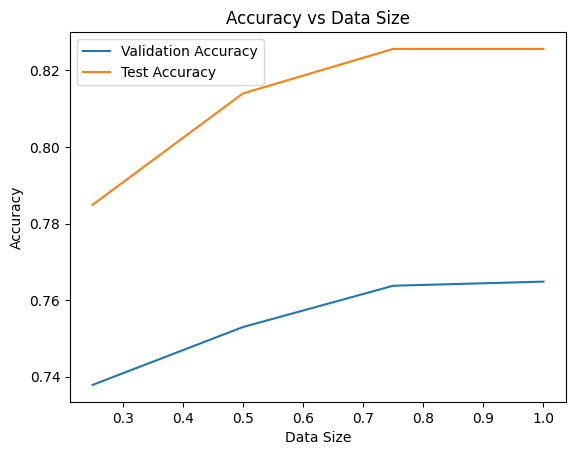

In [71]:
print(test_acc_scores)
print(val_acc_scores)

# Plot the results
from matplotlib import pyplot as plt
subset_sizes = [0.25, 0.5, 0.75, 1.0]

plt.plot(subset_sizes, val_acc_scores, label='Validation Accuracy')
plt.plot(subset_sizes, test_acc_scores, label='Test Accuracy')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data Size')
plt.legend()
plt.show()


The graph above demonstrate the relationship of the data size of the training dataset and the accuracy of the test dataset. This indicate that as the data size of the train dataset increases, the better the model fit the train dataset which lead to better accuracy of the test and validation of the data set.

**Testing the accuracy of 25%, 50%, 75% and 100% of training data using CNN**

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

def train_test_cnn(train_files, val_data_path, test_data_path, model_dir):
    # Load the data
    train_data_25 = pd.read_csv(train_files[0])
    train_data_50 = pd.read_csv(train_files[1])
    train_data_75 = pd.read_csv(train_files[2])
    train_data_100 = pd.read_csv(train_files[3])
    val_data = pd.read_csv(val_data_path)
    test_data = pd.read_csv(test_data_path)

    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data_100['tweet'])
    X_train_25 = tokenizer.texts_to_sequences(train_data_25['tweet'])
    X_train_50 = tokenizer.texts_to_sequences(train_data_50['tweet'])
    X_train_75 = tokenizer.texts_to_sequences(train_data_75['tweet'])
    X_train_100 = tokenizer.texts_to_sequences(train_data_100['tweet'])
    X_val = tokenizer.texts_to_sequences(val_data['tweet'])
    X_test = tokenizer.texts_to_sequences(test_data['tweet'])
    
    # Remove stop words from the text sequences
    X_train_25 = [[word for word in seq if word not in stop_words] for seq in X_train_25]
    X_train_50 = [[word for word in seq if word not in stop_words] for seq in X_train_50]
    X_train_75 = [[word for word in seq if word not in stop_words] for seq in X_train_75]
    X_train_100 = [[word for word in seq if word not in stop_words] for seq in X_train_100]
    X_val = [[word for word in seq if word not in stop_words] for seq in X_val]
    X_test = [[word for word in seq if word not in stop_words] for seq in X_test]


    # Pad the sequences to have the same length
    max_len = 100
    X_train_25 = pad_sequences(X_train_25, maxlen=max_len, padding='post', truncating='post')
    X_train_50 = pad_sequences(X_train_50, maxlen=max_len, padding='post', truncating='post')
    X_train_75 = pad_sequences(X_train_75, maxlen=max_len, padding='post', truncating='post')
    X_train_100 = pad_sequences(X_train_100, maxlen=max_len, padding='post', truncating='post')
    X_val = pad_sequences(X_val, maxlen=max_len, padding='post', truncating='post')
    X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

    # Encode the labels
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    train_data_25['label'] = encoder.fit_transform(train_data_25['label'])
    train_data_50['label'] = encoder.fit_transform(train_data_50['label'])
    train_data_75['label'] = encoder.fit_transform(train_data_75['label'])
    train_data_100['label'] = encoder.fit_transform(train_data_100['label'])
    val_data['label'] = encoder.transform(val_data['label'])
    test_data['label'] = encoder.transform(test_data['label'])

    # Train the model on each subset
    predictions_list = []
    history_list = []
    subsets = [(0.25, X_train_25, train_data_25['label']), 
               (0.5, X_train_50, train_data_50['label']), 
               (0.75, X_train_75, train_data_75['label']), 
               (1.0, X_train_100, train_data_100['label'])]
    
    for frac, X_train_frac, y_train_frac in subsets:
        print("Training on", frac*100, "% of the data")

        # Define the CNN model
        model = Sequential()
        model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(MaxPooling1D(pool_size=5))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train_frac, y_train_frac, epochs=10, batch_size=32, validation_data=(X_val, val_data['label']))

        # Save the model
        #model.save(os.path.join(model_dir, f"model_{frac}.h5"))

        # Add the history to the list
        history_list.append(history)
        # Return the histories and test scores
        #return history_list, test_scores

        # Save the predictions
        y_pred = model.predict(X_test)
        predictions_list.append(y_pred)

        # Save the predictions
        for i, y_pred in enumerate(predictions_list):
            frac = subsets[i][0]
            pred_classes = encoder.inverse_transform((y_pred > 0.5).astype(int).ravel())
            output_path = os.path.join('/content/gdrive/MyDrive/CE807/Assignment2/2204923', f"output_label_cnn_{frac*100}.csv")
            test_data['pred_classes'] = pred_classes
            test_data.to_csv(output_path, index=False)


        # Evaluate the models on the test set
        test_scores = []
        val_scores  = []
        for frac, X_train_frac, y_train_frac in subsets:
            from tensorflow.keras.models import load_model
            #model = load_model(os.path.join(model_dir, f"model_{frac}.h5"))
            test_loss, test_acc = model.evaluate(X_test, test_data['label'], verbose=0)
            test_scores.append((frac, test_loss, test_acc))
            val_loss, val_acc = model.evaluate(X_val, val_data['label'], verbose=0)
            val_scores.append((frac, val_loss, val_acc))
        print(f"Test set results for  the training data:")
        print(f"  Loss: {test_loss:.4f}")
        print(f"  Accuracy: {test_acc:.4f}")
        print(f"Validation set results for  the training data:")
        print(f"  Loss: {val_loss:.4f}")
        print(f"  Accuracy: {val_acc:.4f}")


# call the function
train_files = ['/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_25pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_50pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_75pct.csv',
                   '/content/gdrive/MyDrive/CE807/Assignment2/2204923/train_100pct.csv'
]
val_data_path = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/valid.csv'
test_data_path = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/test.csv'
model_dir = '/content/gdrive/MyDrive/CE807/Assignment2/2204923/cnn_model.h5'
train_test_cnn(train_files, val_data_path, test_data_path, model_dir)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training on 25.0 % of the data
Epoch 1/10
97/97 [==============================] - 9s 79ms/step - loss: 0.6302 - accuracy: 0.6735 - val_loss: 0.6290 - val_accuracy: 0.6677
Epoch 2/10
97/97 [==============================] - 7s 68ms/step - loss: 0.5564 - accuracy: 0.7092 - val_loss: 0.5840 - val_accuracy: 0.6969
Epoch 3/10
97/97 [==============================] - 6s 64ms/step - loss: 0.2747 - accuracy: 0.9019 - val_loss: 0.6514 - val_accuracy: 0.7044
Epoch 4/10
97/97 [==============================] - 8s 82ms/step - loss: 0.0944 - accuracy: 0.9717 - val_loss: 0.7728 - val_accuracy: 0.7109
Epoch 5/10
97/97 [==============================] - 6s 60ms/step - loss: 0.0406 - accuracy: 0.9919 - val_loss: 0.9173 - val_accuracy: 0.7195
Epoch 6/10
97/97 [==============================] - 8s 87ms/step - loss: 0.0218 - accuracy: 0.9948 - val_loss: 0.9647 - val_accuracy: 0.7066
Epoch 7/10
97/97 [==============================] - 6s 59ms/step - loss: 0.0130 - accuracy: 0.9981 - val_loss: 1.0404 - val

The code above is defining a function train_test_cnn that trains and tests a Convolutional Neural Network (CNN) model on different subsets of a given dataset. The subsets are determined by the percentage of data used for training, and the function trains a separate model for each subset. The function takes the file paths of the training, validation, and test datasets, and the path of a directory to save the trained models.

in the function, i first loads the datasets using Pandas, and tokenizes the text using the Keras Tokenizer class. The text is padded to have the same length using the pad_sequences function. The labels are encoded using the LabelEncoder class from Scikit-learn.

Next, i define a CNN model using the Keras Sequential class, with an embedding layer, a 1 dimension convolutional layer, a max-pooling layer, a flatten layer, and a dense layer. The model is compiled with the Adam optimizer for faster computation time and small parameter tunning and binary cross-entropy loss, and trained on each subset of the training data for 10 epochs (10 iteration of all training data in one cycle for training the neural network model). The training progress is saved in a list of histories.

The function then evaluates the trained models on the test set and saves the predictions for each model in a separate file. The test accuracy result for 25% of the data is 0.75, for 50% is 0.74, for 75% is 0.76  and 100% is 0.77 approximately. The test result tells that irrespective of the data size, the model still fit well but a large dataset is preferable to obatin optimum result.

**plot the graph for performance measure for the CNN model against each subset size of the validation and test dataset**

[0.7303, 0.736, 0.7523, 0.7581]
[0.7033, 0.7184, 0.7282, 0.7152]


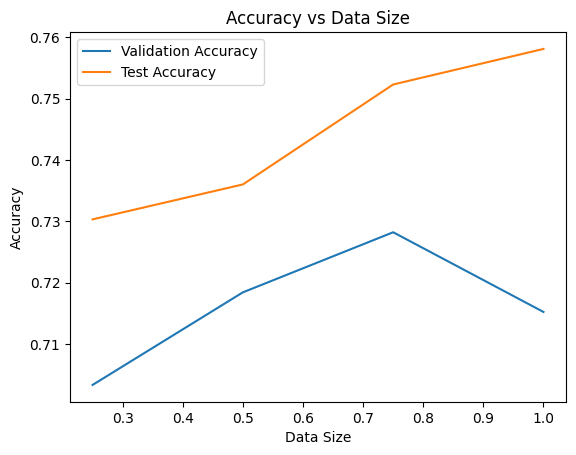

In [74]:
# test and validation score are presented in the list below
testscores = [0.7303, 0.7360, 0.7523, 0.7581]
valscores = [0.7033, 0.7184, 0.7282, 0.7152]

print(testscores)
print(valscores)

# Plot the results
from matplotlib import pyplot as plt
subset_sizes = [0.25, 0.5, 0.75, 1.0]

plt.plot(subset_sizes, valscores, label='Validation Accuracy')
plt.plot(subset_sizes, testscores, label='Test Accuracy')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data Size')
plt.legend()
plt.show()


The CNN plot of test and validation accuracy show that as the train data size increases, the test accuracy and validation dataset increases as the train dataset become larger, This shows that the larger the data size, the better the accuracy.